In [176]:
# Dependencies
import requests
import json
import numpy as np
import pandas as pd
import matplotlib as plt
from api_keys import geoapify_key

# Import the API key
target_airport = "SFO"
date_from = "2022-12-23"
date_to = "2022-12-23"
target_url = f"https://aviation-edge.com/v2/public/flightsHistory?key={geoapify_key}&code=SFO&type=departure&date_from=2022-12-23&date_to=2022-12-23"

In [4]:
airport_data = requests.get(target_url).json()


In [5]:
print(json.dumps(airport_data, indent=4, sort_keys=True))

[
    {
        "airline": {
            "iataCode": "ac",
            "icaoCode": "aca",
            "name": "air canada"
        },
        "arrival": {
            "baggage": "12",
            "gate": "b8",
            "iataCode": "den",
            "icaoCode": "kden",
            "scheduledTime": "2022-12-22t19:40:00.000"
        },
        "codeshared": {
            "airline": {
                "iataCode": "ua",
                "icaoCode": "ual",
                "name": "united airlines"
            },
            "flight": {
                "iataNumber": "ua1823",
                "icaoNumber": "ual1823",
                "number": "1823"
            }
        },
        "departure": {
            "delay": 191,
            "estimatedTime": "2022-12-22t19:19:00.000",
            "gate": "f21",
            "iataCode": "sfo",
            "icaoCode": "ksfo",
            "scheduledTime": "2022-12-22t16:08:00.000",
            "terminal": "3"
        },
        "flight": {
            "

In [6]:
#pd.read_json(airport_data)
airport = json.dumps(airport_data, indent=4, sort_keys=True)

In [8]:
print(airport)

[
    {
        "airline": {
            "iataCode": "ac",
            "icaoCode": "aca",
            "name": "air canada"
        },
        "arrival": {
            "baggage": "12",
            "gate": "b8",
            "iataCode": "den",
            "icaoCode": "kden",
            "scheduledTime": "2022-12-22t19:40:00.000"
        },
        "codeshared": {
            "airline": {
                "iataCode": "ua",
                "icaoCode": "ual",
                "name": "united airlines"
            },
            "flight": {
                "iataNumber": "ua1823",
                "icaoNumber": "ual1823",
                "number": "1823"
            }
        },
        "departure": {
            "delay": 191,
            "estimatedTime": "2022-12-22t19:19:00.000",
            "gate": "f21",
            "iataCode": "sfo",
            "icaoCode": "ksfo",
            "scheduledTime": "2022-12-22t16:08:00.000",
            "terminal": "3"
        },
        "flight": {
            "

In [9]:
df = pd.read_json(airport)
airline = pd.json_normalize(df['airline'])
airline = airline.drop(["iataCode","icaoCode"], axis=1 )
airline

name
0           air canada
1           sa avianca
2      air new zealand
3      asiana airlines
4     virgin australia
...                ...
1534        air france
1535               klm
1536   virgin atlantic
1537   delta air lines
1538  netjets aviation

[1539 rows x 1 columns]

In [10]:
arrival = pd.json_normalize(df['arrival'])
arrival = arrival['iataCode']
arrival

0       den
1       den
2       den
3       den
4       den
       ... 
1534    koa
1535    koa
1536    koa
1537    koa
1538    oak
Name: iataCode, Length: 1539, dtype: object

In [11]:
codeshared = pd.json_normalize(df['codeshared'])
codeshared = codeshared["airline.iataCode"]
codeshared

0        ua
1        ua
2        ua
3        ua
4        ua
       ... 
1534     dl
1535     dl
1536     dl
1537    NaN
1538    NaN
Name: airline.iataCode, Length: 1539, dtype: object

In [12]:
depart = pd.json_normalize(df['departure'])
departure = depart['scheduledTime']
delay = depart['delay']
delay

0       191.0
1       191.0
2       191.0
3       191.0
4       191.0
        ...  
1534    110.0
1535    110.0
1536    110.0
1537    110.0
1538      NaN
Name: delay, Length: 1539, dtype: float64

In [13]:
flight = pd.json_normalize(df['flight'])
flight = flight["iataNumber"]
flight

0       ac5669
1       av2354
2       nz9061
3       oz6350
4       va8340
         ...  
1534    af2442
1535    kl6686
1536    vs3410
1537     dl565
1538     1i678
Name: iataNumber, Length: 1539, dtype: object

In [14]:
df = pd.read_json(airport)
#status = pd.json_normalize(df['status'])
status = df.loc[:, 'status']

In [15]:
code = []
for x in codeshared:
    if str(type(x)) =="<class 'float'>":
        code.append("True")
    else :
        code.append("False")
code = pd.Series(code, name='Codesharing')
df_dataset = pd.concat([airline, arrival, code, departure, delay, flight, status], axis=1)
df_dataset = df_dataset.rename(columns={"name": "Airline","iataCode": "Arrival airport", "scheduledTime": "Scheduled departure"})

In [16]:
df_dataset

Airline Arrival airport Codesharing      Scheduled departure  \
0           air canada             den       False  2022-12-22t16:08:00.000   
1           sa avianca             den       False  2022-12-22t16:08:00.000   
2      air new zealand             den       False  2022-12-22t16:08:00.000   
3      asiana airlines             den       False  2022-12-22t16:08:00.000   
4     virgin australia             den       False  2022-12-22t16:08:00.000   
...                ...             ...         ...                      ...   
1534        air france             koa       False  2022-12-23t15:25:00.000   
1535               klm             koa       False  2022-12-23t15:25:00.000   
1536   virgin atlantic             koa       False  2022-12-23t15:25:00.000   
1537   delta air lines             koa        True  2022-12-23t15:25:00.000   
1538  netjets aviation             oak        True  2022-12-23t15:39:00.000   

      delay iataNumber  status  
0     191.0     ac5669  active  
1     191.0     av2354  active  
2     191.0     nz9061  active  
3     191.0     oz6350  active  
4     191.0     va8340  active  
...     ...        ...     ...  
1534  110.0     af2442  active  
1535  110.0     kl6686  active  
1536  110.0     vs3410  active  
1537  110.0      dl565  active  
1538    NaN      1i678  active  

[1539 rows x 7 columns]

In [17]:
df_data = df_dataset.loc[df_dataset["Codesharing"] == "True"]
df_data = df_data.loc[df_dataset["status"] == "active"]
df_data["delay"] = df_data["delay"].fillna(0)
df_data

Airline Arrival airport Codesharing      Scheduled departure  \
5      united airlines             den        True  2022-12-22t16:08:00.000   
13     united airlines             lax        True  2022-12-22t16:10:00.000   
18     united airlines             yvr        True  2022-12-22t16:10:00.000   
21     united airlines             bur        True  2022-12-22t16:12:00.000   
24     alaska airlines             sna        True  2022-12-22t16:15:00.000   
...                ...             ...         ...                      ...   
1530              aero             sjd        True  2022-12-23t11:15:00.000   
1531   rennia aviation             bzn        True  2022-12-23t10:30:00.000   
1532  skywest airlines             oth        True  2022-12-23t11:35:00.000   
1537   delta air lines             koa        True  2022-12-23t15:25:00.000   
1538  netjets aviation             oak        True  2022-12-23t15:39:00.000   

      delay iataNumber  status  
5     191.0     ua1823  active  
13     13.0     ua1082  active  
18      8.0     ua1542  active  
21     76.0     ua5691  active  
24      9.0     as3492  active  
...     ...        ...     ...  
1530    3.0       td56  active  
1531   10.0             active  
1532   88.0     oo2905  active  
1537  110.0      dl565  active  
1538    0.0      1i678  active  

[453 rows x 7 columns]

In [36]:
airlines_sort = df_data.groupby(by=["Airline"]).count()
airlines_sort = airlines_sort.sort_values(by=['Arrival airport'], ascending=False)
airlines_sort

Arrival airport  Codesharing  Scheduled departure  \
Airline                                                                   
united airlines                   195          195                  195   
alaska airlines                    69           69                   69   
delta air lines                    33           33                   33   
american airlines                  30           30                   30   
southwest airlines                 20           20                   20   
jetblue airways                    16           16                   16   
netjets aviation                    9            9                    9   
air canada                          6            6                    6   
frontier airlines                   6            6                    6   
aeromexico                          4            4                    4   
breeze airways                      3            3                    3   
skywest airlines                    3            3                    3   
sun country airlines                3            3                    3   
korean air                          3            3                    3   
sa avianca                          2            2                    2   
china airlines                      2            2                    2   
ati                                 2            2                    2   
lufthansa                           2            2                    2   
solairus aviation                   2            2                    2   
eva air                             2            2                    2   
ana                                 2            2                    2   
singapore airlines                  2            2                    2   
british airways                     2            2                    2   
air india                           2            2                    2   
aer lingus                          2            2                    2   
hawaiian airlines                   2            2                    2   
qatar airways                       1            1                    1   
vietnam airlines                    1            1                    1   
nicholas air                        1            1                    1   
philippine airlines                 1            1                    1   
swiss                               1            1                    1   
rennia aviation                     1            1                    1   
turkish airlines                    1            1                    1   
sas                                 1            1                    1   
tap air portugal                    1            1                    1   
abx air                             1            1                    1   
gama aviation                       1            1                    1   
klm                                 1            1                    1   
kalitta air                         1            1                    1   
aero                                1            1                    1   
air france                          1            1                    1   
air new zealand                     1            1                    1   
asiana airlines                     1            1                    1   
avcenter                            1            1                    1   
copa airlines                       1            1                    1   
dhl air                             1            1                    1   
emirates                            1            1                    1   
fedex                               1            1                    1   
fiji airways                        1            1                    1   
flexjet                             1            1                    1   
french bee                          1            1                    1   
jal                                 1          

In [40]:
airlines_sort.iloc[0:10,:].index

Index(['united airlines', 'alaska airlines', 'delta air lines',
       'american airlines', 'southwest airlines', 'jetblue airways',
       'netjets aviation', 'air canada', 'frontier airlines', 'aeromexico'],
      dtype='object', name='Airline')

In [34]:
# make a loop for each airline here
airlines_list = df_data['Arrival airport'].unique()

test = df_data.groupby(['Airline'])['delay'].mean(numeric_only=True)



34.0

In [149]:
test = df_data[df_data['Airline'] == 'united airlines']
test

Airline Arrival airport Codesharing      Scheduled departure  \
5     united airlines             den        True  2022-12-22t16:08:00.000   
13    united airlines             lax        True  2022-12-22t16:10:00.000   
18    united airlines             yvr        True  2022-12-22t16:10:00.000   
21    united airlines             bur        True  2022-12-22t16:12:00.000   
34    united airlines             sba        True  2022-12-22t16:22:00.000   
...               ...             ...         ...                      ...   
1488  united airlines             lax        True  2022-12-22t16:10:00.000   
1500  united airlines             phx        True  2022-12-22t19:10:00.000   
1501  united airlines             sea        True  2022-12-22t20:05:00.000   
1505  united airlines             iad        True  2022-12-22t22:35:00.000   
1526  united airlines             san        True  2022-12-23t08:25:00.000   

      delay iataNumber  status  
5     191.0     ua1823  active  
13     13.0     ua1082  active  
18      8.0     ua1542  active  
21     76.0     ua5691  active  
34      9.0     ua5215  active  
...     ...        ...     ...  
1488   13.0     ua8182  active  
1500   11.0     ua8169  active  
1501   15.0     ua8153  active  
1505   46.0     ua8147  active  
1526   31.0     ua8141  active  

[195 rows x 7 columns]

In [128]:
df_data.groupby(['Airline']).count()

Arrival airport  Codesharing  Scheduled departure  \
Airline                                                                   
abx air                             1            1                    1   
aer lingus                          2            2                    2   
aero                                1            1                    1   
aeromexico                          4            4                    4   
air canada                          6            6                    6   
air france                          1            1                    1   
air india                           2            2                    2   
air new zealand                     1            1                    1   
alaska airlines                    69           69                   69   
american airlines                  30           30                   30   
ana                                 2            2                    2   
asiana airlines                     1            1                    1   
ati                                 2            2                    2   
avcenter                            1            1                    1   
breeze airways                      3            3                    3   
british airways                     2            2                    2   
china airlines                      2            2                    2   
copa airlines                       1            1                    1   
delta air lines                    33           33                   33   
dhl air                             1            1                    1   
emirates                            1            1                    1   
eva air                             2            2                    2   
fedex                               1            1                    1   
fiji airways                        1            1                    1   
flexjet                             1            1                    1   
french bee                          1            1                    1   
frontier airlines                   6            6                    6   
gama aviation                       1            1                    1   
hawaiian airlines                   2            2                    2   
jal                                 1            1                    1   
jet edge                            1            1                    1   
jet linx aviation                   1            1                    1   
jetblue airways                    16           16                   16   
kalitta air                         1            1                    1   
klm                                 1            1                    1   
korean air                          3            3                    3   
lufthansa                           2            2                    2   
netjets aviation                    9            9                    9   
nicholas air                        1            1                    1   
philippine airlines                 1            1                    1   
qatar airways                       1            1                    1   
rennia aviation                     1            1                    1   
sa avianca                          2            2                    2   
sas                                 1            1                    1   
singapore airlines                  2            2                    2   
skywest airlines                    3            3                    3   
solairus aviation                   2            2                    2   
southwest airlines                 20           20                   20   
sun country airlines                3            3                    3   
swiss                               1            1                    1   
tap air portugal                    1            1                    1   
turkish airlines                    1          

In [234]:
# Find delay ratio by airline

# Find total number of flights per airline

flight_count = df_data.groupby(['Airline'])['status'].count()
flight_count

# Find total number of delayed flights (>30min)

delay_count = df_data[df_data['delay'] > 30]['Airline'].value_counts()


summary_delays = pd.DataFrame()

summary_delays = summary_delays.append([delay_count, flight_count]).transpose()

summary_delays.columns.values[0] = 'Total Delayed Flights'
summary_delays.columns.values[1] = 'Total Flights'

summary_delays = summary_delays.fillna(0)
# Determine delay ratio

summary_delays['Delay Ratio (%)'] = (summary_delays['Total Delayed Flights']/summary_delays['Total Flights'])*100

# Determine average delay time
delay_trimmed = df_data[df_dataset['delay'] > 30]
summary_delays["Average Delay (min)"] = delay_trimmed.groupby(['Airline'])['delay'].mean()
summary_delays = summary_delays.fillna(0)
summary_delays


/var/folders/78/238gl0sx3sv0k3ys61_lz22w0000gn/T/ipykernel_91426/3614736687.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  summary_delays = summary_delays.append([delay_count, flight_count]).transpose()
/var/folders/78/238gl0sx3sv0k3ys61_lz22w0000gn/T/ipykernel_91426/3614736687.py:26: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  delay_trimmed = df_data[df_dataset['delay'] > 30]


Total Delayed Flights  Total Flights  Delay Ratio (%)  \
united airlines                        98.0          195.0        50.256410   
alaska airlines                        24.0           69.0        34.782609   
american airlines                      13.0           30.0        43.333333   
southwest airlines                     11.0           20.0        55.000000   
delta air lines                        11.0           33.0        33.333333   
frontier airlines                       5.0            6.0        83.333333   
jetblue airways                         5.0           16.0        31.250000   
air canada                              3.0            6.0        50.000000   
sun country airlines                    3.0            3.0       100.000000   
breeze airways                          3.0            3.0       100.000000   
netjets aviation                        2.0            9.0        22.222222   
eva air                                 2.0            2.0       100.000000   
qatar airways                           1.0            1.0       100.000000   
jal                                     1.0            1.0       100.000000   
avcenter                                1.0            1.0       100.000000   
air france                              1.0            1.0       100.000000   
emirates                                1.0            1.0       100.000000   
aer lingus                              1.0            2.0        50.000000   
korean air                              1.0            3.0        33.333333   
asiana airlines                         1.0            1.0       100.000000   
singapore airlines                      1.0            2.0        50.000000   
ana                                     1.0            2.0        50.000000   
china airlines                          1.0            2.0        50.000000   
vietnam airlines                        1.0            1.0       100.000000   
air india                               1.0            2.0        50.000000   
british airways                         1.0            2.0        50.000000   
sas                                     1.0            1.0       100.000000   
air new zealand                         1.0            1.0       100.000000   
french bee                              1.0            1.0       100.000000   
skywest airlines                        1.0            3.0        33.333333   
abx air                                 0.0            1.0         0.000000   
aero                                    0.0            1.0         0.000000   
aeromexico                              0.0            4.0         0.000000   
ati                                     0.0            2.0         0.000000   
copa airlines                           0.0            1.0         0.000000   
dhl air                                 0.0            1.0         0.000000   
fedex                                   0.0            1.0         0.000000   
fiji airways                            0.0            1.0         0.000000   
flexjet                                 0.0            1.0         0.000000   
gama aviation                           0.0            1.0         0.000000   
hawaiian airlines                       0.0            2.0         0.000000   
jet edge                                0.0            1.0         0.000000   
jet linx aviation                       0.0            1.0         0.000000   
kalitta air                             0.0            1.0         0.000000   
klm                                     0.0            1.0         0.000000   
lufthansa                               0.0            2.0         0.000000   
nicholas air                            0.0            1.0         0.000000   
philippine airlines                     0.0            1.0         0.000000   
rennia aviation                         0.0            1.0         0.000000   
sa avianca                              0.0            2.0         0.000

In [197]:
import matplotlib.pyplot as plt

In [237]:
summary_delays.reset_index(drop=False, inplace=True)
summary_delays.columns.values[0] = 'Airline'
summary_delays

Airline  Total Delayed Flights  Total Flights  \
0        united airlines                   98.0          195.0   
1        alaska airlines                   24.0           69.0   
2      american airlines                   13.0           30.0   
3     southwest airlines                   11.0           20.0   
4        delta air lines                   11.0           33.0   
5      frontier airlines                    5.0            6.0   
6        jetblue airways                    5.0           16.0   
7             air canada                    3.0            6.0   
8   sun country airlines                    3.0            3.0   
9         breeze airways                    3.0            3.0   
10      netjets aviation                    2.0            9.0   
11               eva air                    2.0            2.0   
12         qatar airways                    1.0            1.0   
13                   jal                    1.0            1.0   
14              avcenter                    1.0            1.0   
15            air france                    1.0            1.0   
16              emirates                    1.0            1.0   
17            aer lingus                    1.0            2.0   
18            korean air                    1.0            3.0   
19       asiana airlines                    1.0            1.0   
20    singapore airlines                    1.0            2.0   
21                   ana                    1.0            2.0   
22        china airlines                    1.0            2.0   
23      vietnam airlines                    1.0            1.0   
24             air india                    1.0            2.0   
25       british airways                    1.0            2.0   
26                   sas                    1.0            1.0   
27       air new zealand                    1.0            1.0   
28            french bee                    1.0            1.0   
29      skywest airlines                    1.0            3.0   
30               abx air                    0.0            1.0   
31                  aero                    0.0            1.0   
32            aeromexico                    0.0            4.0   
33                   ati                    0.0            2.0   
34         copa airlines                    0.0            1.0   
35               dhl air                    0.0            1.0   
36                 fedex                    0.0            1.0   
37          fiji airways                    0.0            1.0   
38               flexjet                    0.0            1.0   
39         gama aviation                    0.0            1.0   
40     hawaiian airlines                    0.0            2.0   
41              jet edge                    0.0            1.0   
42     jet linx aviation                    0.0            1.0   
43           kalitta air                    0.0            1.0   
44                   klm                    0.0            1.0   
45             lufthansa                    0.0            2.0   
46          nicholas air                    0.0            1.0   
47   philippine airlines                    0.0            1.0   
48       rennia aviation                    0.0            1.0   
49            sa avianca                    0.0            2.0   
50     solairus aviation                    0.0            2.0   
51                 swiss                    0.0            1.0   
52      tap air portugal                    0.0            1.0   
53      turkish airlines                    0.0            1.0   
54       virgin atlantic                    0.0            1.0   

    Delay Ratio (%)  Average Delay (min)  
0         50.256410            83.469388  
1         34.782609            58.833333  
2         43.333333           118.307692  
3         55.000000            81.636364  
4         33.333333            82.818182  
5         83.333333            61.600000  
6         31.250000

In [238]:
summary_delays['Airline']

0          united airlines
1          alaska airlines
2        american airlines
3       southwest airlines
4          delta air lines
5        frontier airlines
6          jetblue airways
7               air canada
8     sun country airlines
9           breeze airways
10        netjets aviation
11                 eva air
12           qatar airways
13                     jal
14                avcenter
15              air france
16                emirates
17              aer lingus
18              korean air
19         asiana airlines
20      singapore airlines
21                     ana
22          china airlines
23        vietnam airlines
24               air india
25         british airways
26                     sas
27         air new zealand
28              french bee
29        skywest airlines
30                 abx air
31                    aero
32              aeromexico
33                     ati
34           copa airlines
35                 dhl air
36                   fedex
3

[Text(0, 0, '195'),
 Text(0, 0, '69'),
 Text(0, 0, '30'),
 Text(0, 0, '20'),
 Text(0, 0, '33'),
 Text(0, 0, '6'),
 Text(0, 0, '16'),
 Text(0, 0, '6'),
 Text(0, 0, '3'),
 Text(0, 0, '3'),
 Text(0, 0, '9'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '3'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '4'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '2'),
 Text(0, 0, '2'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1'),
 Text(0, 0, '1')]

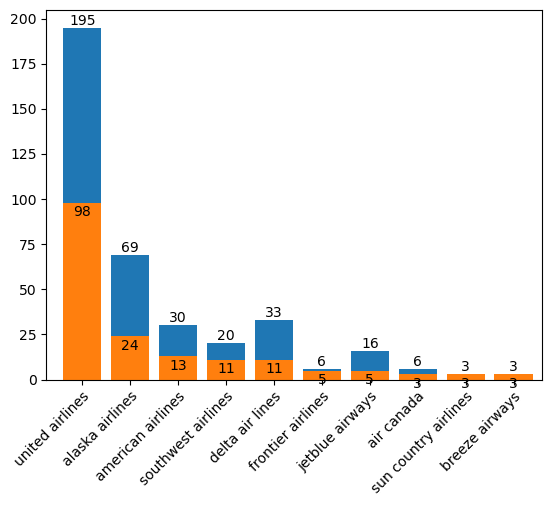

In [247]:
graph_total = plt.bar(summary_delays['Airline'], summary_delays['Total Flights'])
graph_delay = plt.bar(summary_delays['Airline'], summary_delays['Total Delayed Flights'])
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.xlim([-.75, 9.6])

plt.bar_label(container=graph_delay, padding=-12)
plt.bar_label(container=graph_total, padding=0)

In [223]:
summary_delays.iloc[0:10,:]

Airline  Total Delayed Flights  Total Flights  \
0       united airlines                   98.0          195.0   
1       alaska airlines                   24.0           69.0   
2     american airlines                   13.0           30.0   
3    southwest airlines                   11.0           20.0   
4       delta air lines                   11.0           33.0   
5     frontier airlines                    5.0            6.0   
6       jetblue airways                    5.0           16.0   
7            air canada                    3.0            6.0   
8  sun country airlines                    3.0            3.0   
9        breeze airways                    3.0            3.0   

   Delay Ratio (%)  Average Delay (min)  
0        50.256410            83.469388  
1        34.782609            58.833333  
2        43.333333           118.307692  
3        55.000000            81.636364  
4        33.333333            82.818182  
5        83.333333            61.600000  
6        31.250000            45.400000  
7        50.000000           218.000000  
8       100.000000            44.666667  
9       100.000000           112.333333